Exercício 1 — Análise de Array NumPy

Você recebeu um array NumPy com os valores de temperatura (em °C) registrados ao longo de uma semana:



1.   Calcule a temperatura média da semana.
2.   Encontre a temperatura mais alta e a mais baixa.
3.   Quantos dias ficaram acima da média?

In [ ]:
import numpy as np
temp = [22.5, 23.0, 19.5, 21.0, 25.2, 26.3, 24.5]
temperaturas = np.array(temp)

**Solução do Exercício 1**

In [ ]:
media = temperaturas.mean()
print(media)
print(round(media,2))

23.142857142857142
23.14


In [ ]:
media = temperaturas.mean()
max_temp = temperaturas.max()
min_temp = temperaturas.min()
dias_acima_media = np.sum(temperaturas > media)

print(f"Média: {media:.2f}°C")
print(f"Máxima: {max_temp}°C, Mínima: {min_temp}°C")
print(f"Dias acima da média: {dias_acima_media}")

print("Média:", round(media, 2), "°C")


Média: 23.14°C
Máxima: 26.3°C, Mínima: 19.5°C
Dias acima da média: 3
Média: 23.14 °C


Exercício 2 — Manipulando um DataFrame

Crie um DataFrame com os dados de 5 alunos, contendo as colunas: nome, nota_prova1, nota_prova2.

Depois:

1. Calcule a média de cada aluno.

2. Adicione uma nova coluna chamada aprovado, considerando média >= 7.

3. Mostre apenas os alunos aprovados.

**Solução do Exercício 2**



In [1]:
#Crie seu código do exercício 2 aqui.
import pandas as pd

dados = {
    'nome': ['Ana', 'Bruno', 'Carla', 'Diego', 'Eva'],
    'av1': [6.5, 7.0, 8.0, 5.5, 9.0],
    'av2': [7.5, 6.0, 8.5, 6.0, 8.0]
}

df = pd.DataFrame(dados)
df['media'] = (df['av1'] + df['av2']) / 2
df['aprovado'] = df['media'] >= 7

#Opção 1
print(df[df['aprovado']])

    nome  av1  av2  media  aprovado
0    Ana  6.5  7.5   7.00      True
2  Carla  8.0  8.5   8.25      True
4    Eva  9.0  8.0   8.50      True


Opção 2 - Filtrando alunos aprovados com .query()

In [8]:
#Opção 2
# Filtrando alunos aprovados com .query()
aprovados = df.query('aprovado == True')
print(aprovados)

    nome  av1  av2  media  aprovado
0    Ana  6.5  7.5   7.00      True
2  Carla  8.0  8.5   8.25      True
4    Eva  9.0  8.0   8.50      True


In [11]:
#Ou, para uma versão mais simples:
aprovados = df.query('aprovado')
#print(aprovados)

# Selecionando apenas nome e média dos aprovados
aprovados = df.loc[df['aprovado'], ['nome', 'media']]
print(aprovados)

    nome  media
0    Ana   7.00
2  Carla   8.25
4    Eva   8.50


Opção 3 - Filtrando alunos aprovados com .loc[]

In [16]:
#Opção 3
#Usando .loc[]
#O .loc[] pode ser usado de maneira muito semelhante ao filtro com df[df['aprovado']], mas pode ser mais explícito.
#aprovados = df.loc[df['aprovado'] == True]
#print(aprovados)


#Ou de maneira mais compacta, sem precisar comparar com True explicitamente:
aprovados = df.loc[df['aprovado']]
print(aprovados)


    nome  av1  av2  media  aprovado
0    Ana  6.5  7.5   7.00      True
2  Carla  8.0  8.5   8.25      True
4    Eva  9.0  8.0   8.50      True


Opção 4 - Se você quiser **percorrer o DataFrame manualmente** para buscar apenas os alunos aprovados, você pode usar um loop for para iterar sobre as linhas do DataFrame. Uma maneira simples de fazer isso é utilizando o método .iterrows(), que permite iterar sobre cada linha do DataFrame como uma tupla contendo o índice e os dados da linha.

In [19]:
#Opção 4
# Percorrendo o DataFrame para buscar apenas os aprovados

aprovados = []

for index, row in df.iterrows():
    #  print('index:', index)
    #  print('dados:', row)
    #  print('*' * 50)
     if row['aprovado']:  # Verifica se o aluno está aprovado
        aprovados.append(row)

# Criando um novo DataFrame com os aprovados
df_aprovados = pd.DataFrame(aprovados)
print('=' * 50)
print(df_aprovados)



    nome  av1  av2  media  aprovado
0    Ana  6.5  7.5   7.00      True
2  Carla  8.0  8.5   8.25      True
4    Eva  9.0  8.0   8.50      True


**Exercício 3 — Estatísticas:**

Você tem um DataFrame com dados de vendas:

1. Calcule o total de vendas por produto.

2. Qual foi o produto com maior valor médio de venda?

3. Adicione uma coluna com o valor acumulado (cumulativo) por linha.


In [20]:
#DataFrame com dados de vendas
dados = {
    'produto': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
    'valor': [100, 200, 150, 300, 250, 120, 280]
}

{'produto': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
 'valor': [100, 200, 150, 300, 250, 120, 280]}

**Solução do Exercício 3**

In [32]:
df = pd.DataFrame(dados)
# Total de vendas por produto
total_por_produto = df.groupby('produto')['valor'].sum()
#total_por_produto
# Produto com maior média de venda
media_por_produto = df.groupby('produto')['valor'].mean()
print(media_por_produto)
maior_media = media_por_produto.idxmax()
print(maior_media)
# Valor acumulado
df['valor_acumulado'] = df['valor'].cumsum()

print('Total de vendas por produto:')
print(total_por_produto)

print(f"Produto com maior média: {maior_media}")
print(df)


produto
A    123.333333
B    225.000000
C    290.000000
Name: valor, dtype: float64
C
Total de vendas por produto:
produto
A    370
B    450
C    580
Name: valor, dtype: int64
Produto com maior média: C
  produto  valor  valor_acumulado
0       A    100              100
1       B    200              300
2       A    150              450
3       C    300              750
4       B    250             1000
5       A    120             1120
6       C    280             1400


Exercício 4 — Gráfico de Barras com Pandas e Matplotlib

Você recebeu os seguintes dados de vendas mensais de uma loja:

1. Crie um gráfico de barras para exibir as vendas por mês.

2. Adicione título, rótulos nos eixos e mude a cor das barras para vermelha.

In [33]:
#import pandas as pd
#dados de vendas mensais de uma loja
dados = {
    'mes': ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'],
    'vendas': [1200, 1500, 1700, 1600, 1800, 2000]
}

df = pd.DataFrame(dados)


** Solução do Exercício 4**

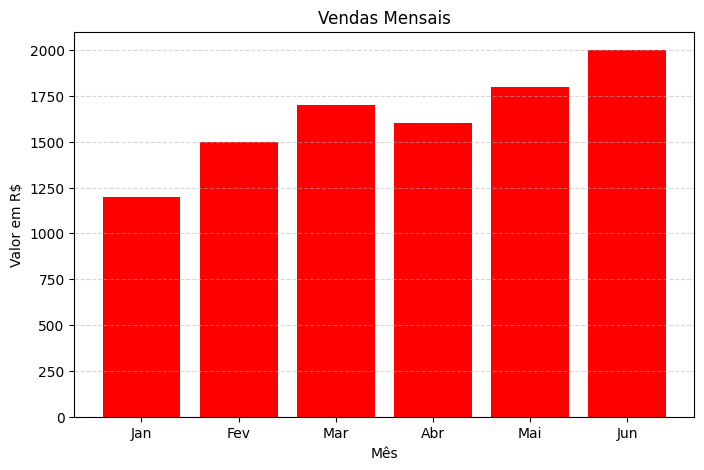

In [39]:
import matplotlib.pyplot as plt

# Criação do gráfico
plt.figure(figsize=(8, 5)) #L/A
plt.bar(df['mes'], df['vendas'], color='red')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Valor em R$')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Exibindo o gráfico
plt.show()


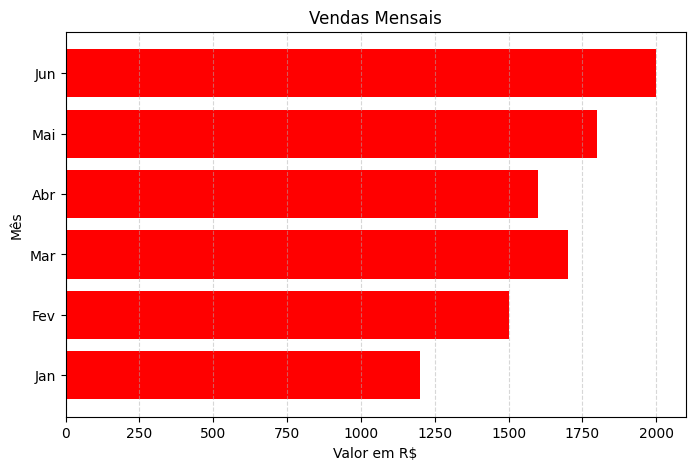

In [40]:
#Gerando o mesmo gráfico na horozontal
#import matplotlib.pyplot as plt

# Criação do gráfico de barras horizontal
plt.figure(figsize=(8, 5))  # L/A
plt.barh(df['mes'], df['vendas'], color='red')  # Usando "barh" para barras horizontais
plt.title('Vendas Mensais')
plt.xlabel('Valor em R$')  # O eixo X agora representa as vendas
plt.ylabel('Mês')  # O eixo Y agora representa os meses
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Ajustando a grade para o eixo X

# Exibindo o gráfico
plt.show()

Exercício 5 — Salvando Aprovados em um Arquivo .txt

1. Crie dados de 10 alunos e suas notas em **três avaliações** da disciplina de Programação Python.

2. Calcule a **média das três notas** para cada aluno.

3. Filtre os alunos com **média maior que 8**.

4. Salve os nomes dos aprovados em um arquivo chamado aprovados.txt, um nome por linha. Ao lado do nome coloca a seguinte mensagem: "Parabéns, você foi aprovado em Python."

5. Leia o arquivo aprovados.txt e mostre os nomes dos aprovados com a mensagem.


**Solução do Exercício 5**

In [ ]:
import pandas as pd

# 1. Criando os dados
dados = {
    'nome': ['Ana', 'Bruno', 'Carla', 'Diego', 'Eva', 'Felipe', 'Giulia', 'Heitor', 'Isabela', 'João'],
    'nota1': [9.0, 7.5, 8.5, 6.0, 9.5, 8.2, 7.8, 8.8, 9.1, 7.0],
    'nota2': [8.5, 6.5, 9.0, 7.0, 8.5, 8.0, 8.2, 9.0, 9.5, 7.5],
    'nota3': [9.0, 8.0, 8.5, 7.0, 9.0, 9.0, 7.5, 8.7, 8.8, 6.5]
}

df = pd.DataFrame(dados)

# 2. Calculando média
df['media'] = df[['nota1', 'nota2', 'nota3']].mean(axis=1)

#df['media2'] = (df['nota1'] + df['nota2'] + df['nota3']) / 3
# print(df)

# print('*'*50)
# 3. Filtrando aprovados
aprovados = df[df['media'] > 8]
# print(aprovados)
# print('*'*50)

# 4. Salvando nomes com mensagem personalizada
mensagem = "Parabéns, você foi aprovado em Python."
with open('aprovados.txt', 'w') as f:
    for nome in aprovados['nome']:
        f.write(f"{nome} - {mensagem}\n")

# 5. Lendo e mostrando os aprovados com mensagem
with open('aprovados.txt', 'r') as f:
    print("Mensagens para aprovados:")
    for linha in f:
        print(linha.strip())



Mensagens para aprovados:
Ana - Parabéns, você foi aprovado em Python.
Carla - Parabéns, você foi aprovado em Python.
Eva - Parabéns, você foi aprovado em Python.
Felipe - Parabéns, você foi aprovado em Python.
Heitor - Parabéns, você foi aprovado em Python.
Isabela - Parabéns, você foi aprovado em Python.
